<a href="https://colab.research.google.com/github/xueyao15/rrc_sml_assigment2/blob/main/Polynomial_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Polynomial Regression
Regression Group 8:
* Mat Bosc (Evaluator)
* Paola Katherine Pacheco (Facilitator)
* Wai Ping Kwok 
* Xueyao Wang 

In [ ]:
# install turicreate in Google Colab
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 17.0 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=0cf115c9a9ad82caefad57b9f566b211f779e2db0a49f6846220b2cf146315af
  Stored in directory: /root/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=cb067c457d805cdf07070a0c7acd6317ce47c009ffdb3b8e8d0c24e508e62d67

# Chapter 4: Testing and regularization with Turi Create

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

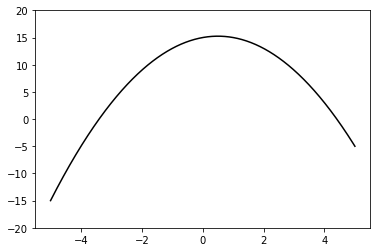

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

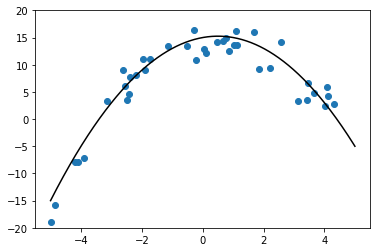

In [ ]:
plt.scatter(X, Y)
draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
import turicreate as tc

In [ ]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.4442185152504816,6.685961311021467
-2.4108324970703663,4.690236225597948
0.11274721368608542,12.205789026637378
-1.9668727392107255,11.133217991032268
-0.23403045847644144,10.927272159051856
0.046868558173902564,12.8584762866286
-2.1816215560029617,8.16012255928749
-2.4949365863755943,3.5061587527226514
4.097462559682402,5.933186396721837
4.021659504395828,2.454299054753137


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
for i in range(2,200):
    string = 'x^'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data

x,y,x^2,x^3,x^4
3.4442185152504816,6.685961311021467,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,4.690236225597948,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,12.205789026637378,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,11.133217991032268,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,10.927272159051856,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,12.8584762866286,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,8.16012255928749,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,3.5061587527226514,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,5.933186396721837,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,2.454299054753137,16.173745169297295,65.04529598178058,261.5900328013676


## Splitting data into training and testing

In [ ]:
train, test = data.random_split(.8, seed=0)

In [ ]:
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(test['x'], test['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

## Training a polynomial regression model with no regularization

In [ ]:
model_no_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

In [ ]:
model_no_reg

Class                          : LinearRegression

Schema
------
Number of coefficients         : 200
Number of examples             : 34
Number of feature columns      : 199
Number of unpacked features    : 199

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0084

Settings
--------
Residual sum of squares        : 32.4758
Training RMSE                  : 0.9773

Highest Positive Coefficients
-----------------------------
x^5                            : 20.9357
x^4                            : 19.2281
(intercept)                    : 12.2089
x^8                            : 7.8684
x                              : 7.3384

Lowest Negative Coefficients
----------------------------
x^3                            : -25.5809


Training error (rmse): 0.9773283539506342
Testing error (rmse): 15.912144146843525


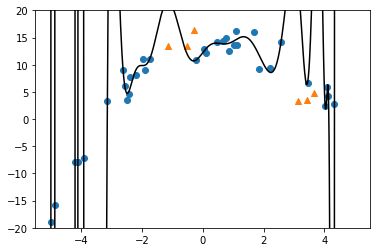

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  12.208931624656543 |
|      x      |  7.338371925834938  |
|     x^2     |  -1.009719929894946 |
|     x^3     |  -25.58088861212472 |
|     x^4     |  19.22814473344504  |
|     x^5     |  20.935671268153904 |
|     x^6     | -19.312564024964047 |
|     x^7     | -6.6943357384892375 |
|     x^8     |  7.868441557431117  |
|     x^9     |  0.7440621059060603 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
model_L1_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)

In [ ]:
model_L1_reg

Class                          : LinearRegression

Schema
------
Number of coefficients         : 200
Number of examples             : 34
Number of feature columns      : 199
Number of unpacked features    : 199

Hyperparameters
---------------
L1 penalty                     : 0.1
L2 penalty                     : 0.0

Training Summary
----------------
Solver                         : fista
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 0.0187

Settings
--------
Residual sum of squares        : 3002.7204
Training RMSE                  : 9.4739

Highest Positive Coefficients
-----------------------------
(intercept)                    : 0.5656
x                              : 0.0694
x^2                            : 0.0076
x^3                            : 0.0039
x^5                            : 0.0002

Lowest Negative Coefficients
----------------------------
x^4                            : -0.000

Training error (rmse): 9.473874911154354
Testing error (rmse): 10.077027617091748


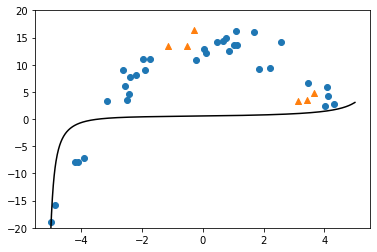

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    0.5655798426406277   |
|      x      |   0.06940816365046576   |
|     x^2     |   0.007552836827385347  |
|     x^3     |   0.003947237269580271  |
|     x^4     | -0.00021279451431743305 |
|     x^5     |  0.0001904801779238345  |
|     x^6     | -1.7985140462517314e-05 |
|     x^7     |  7.880814935063952e-06  |
|     x^8     |  -8.895545466589715e-07 |
|     x^9     |  3.020651102542037e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
model_L2_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 1.7146736386897217
Testing error (rmse): 3.4136157972105736


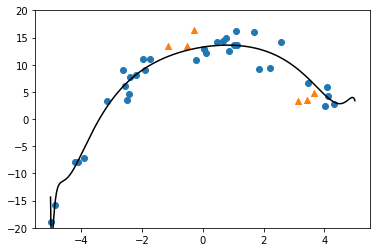

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    13.242877632262726   |
|      x      |    0.8742327276129036   |
|     x^2     |   -0.5194425440520498   |
|     x^3     |  0.0060073086464938925  |
|     x^4     |   -0.02161169966964377  |
|     x^5     |  0.0011472313840809882  |
|     x^6     | -0.00039568239266102296 |
|     x^7     |  3.537559873071844e-05  |
|     x^8     | -1.0652607278689033e-07 |
|     x^9     |  5.825198471934891e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
predictions = test['x', 'y']
predictions['No reg'] = model_no_reg.predict(test)
predictions['L1 reg'] = model_L1_reg.predict(test)
predictions['L2 reg'] = model_L2_reg.predict(test)

In [ ]:
predictions

x,y,No reg,L1 reg,L2 reg
-0.2785728454728664,16.36505651355184,10.712104932151867,0.5467437924583817,12.958767791803538
3.6530992777164,4.83366913200435,35.720855227904394,1.2303202834642817,6.45039335199794
-0.5203042856442961,13.47860807272069,12.055259206352734,0.530931865148386,12.644906915280385
3.14466863291336,3.2664703661537313,24.62674826850707,1.0254405801644773,9.082077532784359
-1.1509885402733957,13.436894195835206,21.60866466806543,0.48885372921707737,11.49807964673347
3.424602231401824,3.5269925176080537,6.37982179451501,1.12709924827482,7.701281752205789


# Answers

## **Problem 1(a)**


**What is the polynomial that is being fit?**

The polynomial that is being fit is -x^2+x+15


**How are the data points generated?**

The data points are generated by random.

For x, they are float generated using uniform probability random in the range -5 to 5 (both ends included).

For y, they are value of the polynomial -x^2+x+15 with the corresponding x, plus the float generated using Gaussian distribution (normal distribution) with mean 0 and standard deviation 2. 


## **Problem 1(b)**

**How many rows and columns are there in *data* before it is split into training and testing sets?**

There are 40 rows and 200 columns in *data* before it is split into training and testing sets.


**What percentage of the data is used in training? What is the remaining data used for?**

80% of the data is used in training.

The remaining 20% is used in testing. 

## **Problem 1(c)**

**Compare the training and testing error of *model_no_reg*, *model_L1_reg*, and *model_L2_reg*.**

1. *model_no_reg*
  * Training error (rmse): 0.9773283539506342 *(very low)*
  * Testing error (rmse): 15.912144146843525 *(very high)*

2. *model_L1_reg*
  * Training error (rmse): 9.473874911154354 *(high)*
  * Testing error (rmse): 10.077027617091748 *(high)*

3. *model_L2_reg*
  * Training error (rmse): 1.7146736386897217 *(low)*
  * Testing error (rmse): 3.4136157972105736 *(low)*

**Comment on what this implies in terms of overfitting and/or underfitting.**

1. For *model_no_reg*, the training error is *very low* yet the testing error is *very high*. It implies the model is **overfitting**. The difference between testing and training error is very high and in this case it may represent lack of data to train, or there are irrelevant features.

2. For *model_L1_reg*, the training error is *high* and the testing error is *high*. It implies the model is **underfitting**. 

3. For *model_L2_reg*, the training error is *low*; the testing error is *low* and slightly larger than the training error. It implies the model is neither **overfitting** nor **underfitting**, it's a **good fit**.


In [ ]:
# obtain the value of training error and testing error
model_no_reg = [0.9773283539506342,15.912144146843525]
model_L1_reg = [9.473874911154354,10.077027617091748]
model_L2_reg = [1.7146736386897217,3.4136157972105736]

# put the errors into a dataframe
data = pd.DataFrame({'model_no_reg':model_no_reg, 
                     'model_L1_reg':model_L1_reg, 
                     'model_L2_reg':model_L2_reg})
data

,model_no_reg,model_L1_reg,model_L2_reg
0,0.977328,9.473875,1.714674
1,15.912144,10.077028,3.413616


In [ ]:
# transpose the dataframe
data2=pd.DataFrame.transpose(data)

# specify the column name
data2.rename(columns={0:'Training error', 1:'Testing error'}, inplace=True)

data2

,Training error,Testing error
model_no_reg,0.977328,15.912144
model_L1_reg,9.473875,10.077028
model_L2_reg,1.714674,3.413616


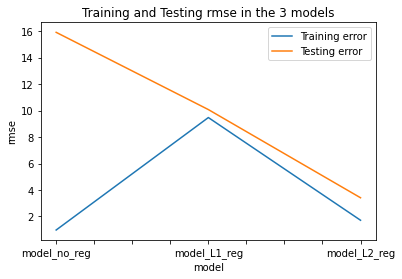

In [ ]:
# plot the training and testing rmse
data2.plot(xlabel="model", ylabel="rmse", title="Training and Testing rmse in the 3 models")

## **Problem 1(d)**

Considering training and testing error, the scatter plots and the list of predictions, discuss which of the three models you would recommend.

We would recommend *model_L2_reg*.

* *model_no_reg*
 - The training error is very low yet the testing error is very large. The big difference between the two errors implies this model is overfitting. 
 - The regression line fits all training data points perfectly but doesn't fit the testing points well in the scatter plot.
 - It is obvious to tell that the absolute values of difference between the actual value and the predicted values are big.

* *model_L1_reg*
 - Both the training error and testing error are large which implies the model is underfitting.
 - The regression line gets closer to the testing points than *model_no_reg*, but it is almost a horizontal line at y = 0 in the scatter plot.
 - The predictions are not that great either, because the predicted values are  around the horizontal line.

* *model_L2_reg* - the best model
 - The training error and the testing error are both low, which implies the model is neither overfitting nor underfitting. It is a best fit.
 - The regression line is along the area with training data in the scatter plot.
 - The predictions are reacting to the change in x value accordingly.